Overview of ways how we can analyze wallet https://etherscan.io/address/0x99fd1378ca799ed6772fe7bcdc9b30b389518962

First of all we can use analytics provided by Etherscan itself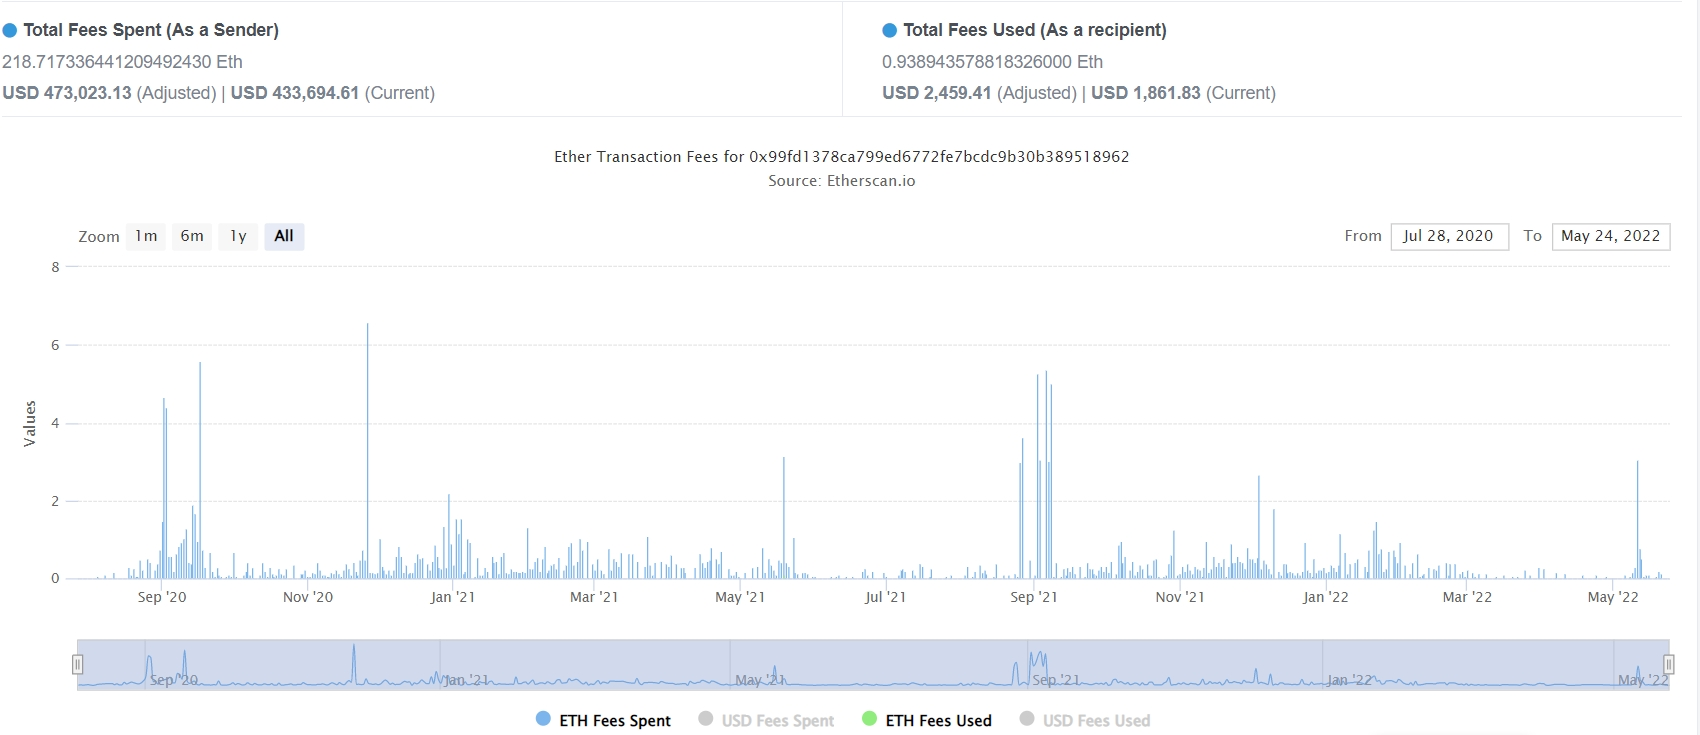

We can use python requests module and make API calls to gather data from Etherscan
(in this example I'm using just subset of Etherscan data)

In [1]:
from requests import get
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
import pandas as pd
import numpy as np

In [2]:
API_KEY = '6PRP6DU46U52KTU7VJPMS4RVFP43AH4XH5'
address = '0x99fd1378ca799ed6772fe7bcdc9b30b389518962'
BASE_URL = 'https://api.etherscan.io/api'

ETH_VALUE = 10**18

In [3]:
def make_api_url(module, action,address, **kwargs):
    
    url = BASE_URL + f"?module={module}&action={action}&address={address}&apikey={API_KEY}"

    for key,value in kwargs.items():
        url += f"&{key}={value}"
    return url

In [4]:
def get_account_balance(address):
    balance_url = make_api_url("account","balance", address, tag="latest")
    #print(get_balance_url)
    response = get(balance_url)
    data = response.json()
    balance = int(data["result"])/ETH_VALUE

    return balance


In [9]:
eth = get_account_balance(address)
print(eth)

19.969295816642408



Get all Historical transactions is PRO (paid) feature
but we can combine free get 'Normal' and 'Internal' transactions API calls

In [15]:
def get_transactions(address):
    transactions_url = make_api_url("account","txlist", address, startblock=0,endblock=99999999, page=1, offset=10000, sort="asc")
    
    response = get(transactions_url)
    
    data = response.json()["result"]

    
    internal_tx_url = make_api_url("account","txlistinternal", address, startblock=0,endblock=99999999, page=1, offset=10000, sort="asc")
    response2 = get(internal_tx_url)
    
    data2 = response2.json()["result"]

    #let's combine two datasets together
    data.extend(data2)
    data.sort(key=lambda x: int(x['timeStamp']))
   
    
    current_balance = 0
    balances = []
    times = []

    for tx in data:
        time = datetime.fromtimestamp(int(tx["timeStamp"]))
        to = tx["to"]
        from_addr = tx["from"]
        value = int(tx["value"])/ETH_VALUE
        
        # take into account that Internal transactions don't have gas price!
        if "gasPrice" in tx:
            gas = int(tx["gasUsed"]) * int(tx["gasPrice"])/ETH_VALUE
        else:
            gas = int(tx["gasUsed"])/ETH_VALUE

        money_in = to.lower() == address.lower()
        
        if money_in:
            current_balance += value
        else:
            current_balance -= value + gas

        balances.append(current_balance)
        times.append(time)

    plt.plot(times,balances)
    plt.show()

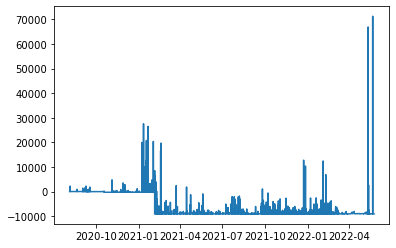

In [16]:
get_transactions(address)

Another way is to download Transactions csv and use BI tool to visualise this data (we have limitation of 5000 records to download)
I used Power BI to find some correllations in downloaded transactions dataset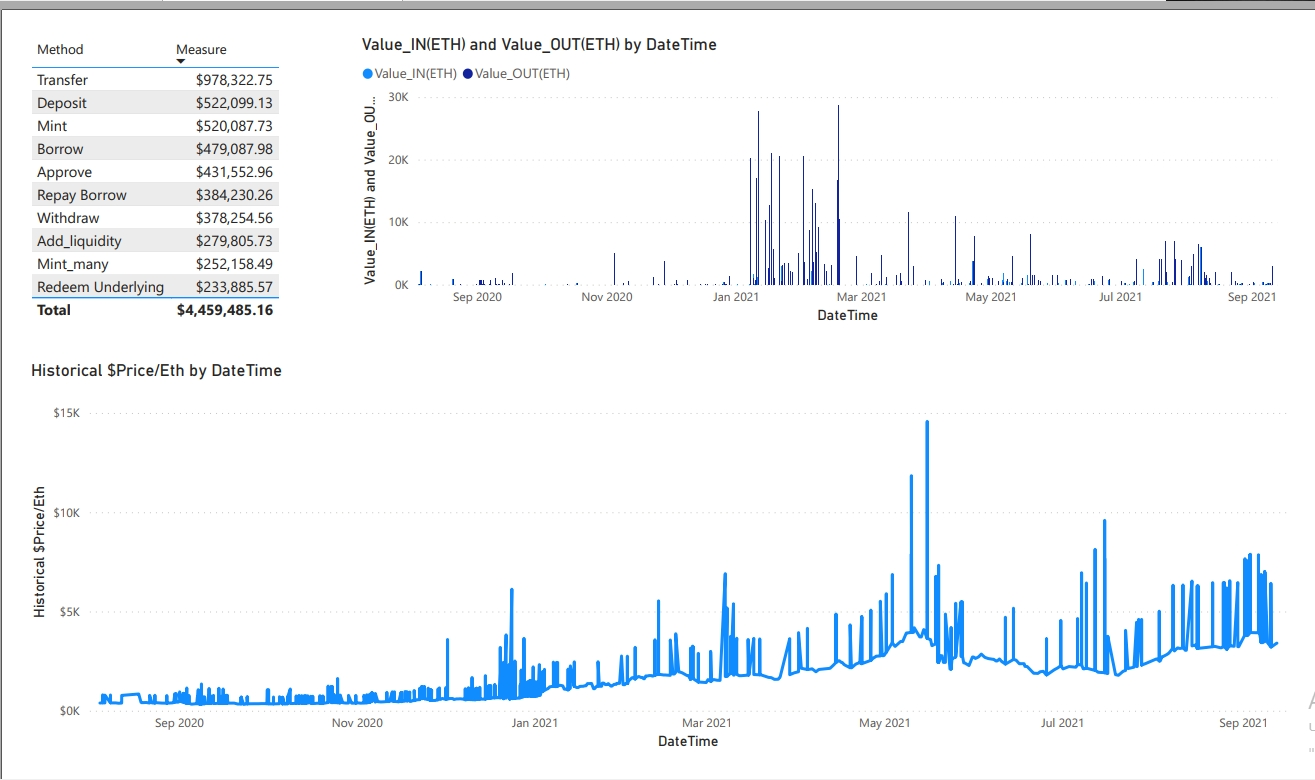
